<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

여름 농어철에 농어 주문이 크게 늘어 MBC 마켓에서 업계 최초로 농어를 무게 단위로 판매하려함.

무게단위로 판매 시 가격 측정이 원활하고, 고객도 합리적이라 판단할 수 있음.

공급처에서 생선 무게를 잘못 측정해서 보내는 경우도 있음.

* 농어의 무게를 재측정
* 다른 데이터는 정상범위가 있으니, 예측할 수 있음.
* 예측하는 것을 회귀라고 함.
* 샘플 데이터가 필요함
* 외부에서 56개의 샘플을 받아 처리예정

지도학습은 크게 2가지로 나뉜다.
* 분류(2진분류)
* 회귀(예측 : 확률(임의의 어떤 숫자로 예측)) : 두 변수 사이에 상관관계를 분석하는 방법

In [1]:
# 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 리눅스 명령어
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
# 농어의 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

기초자료


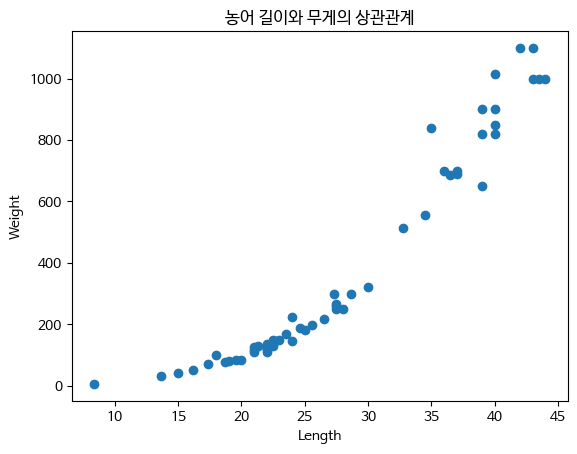

In [5]:
import matplotlib.pyplot as plt
# 폰트 적용 하려면 런타임에 세션 다시시작 후 처음부터 다시 다 실행해야함
plt.rc('font', family = 'NanumBarunGothic')    # 한글처리

plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
print('기초자료')
plt.title('농어 길이와 무게의 상관관계')
plt.show()

# 산점도를 그리고 나니 글이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련과 테스트를 진행해보자

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀
# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측

# 예시
# k = 3 이라고 가정하면, 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k개를 선택 후 target값 100, 80, 60을 더해 3으로 나눈값(평균)이 target값으로 사용됨

In [6]:
# 사이킷런에서 제공하는 훈련세트. 테스트세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
# 사이킷 런의 train_test_split 함수를 사용하여 훈련세트와 테스트세트로 나눔
# random_state = 42는 서로 같은 테스트를 위해 시드값 제공

# 사이킷 런에 사용할 훈련 세트는 2차우너 배열을 사용함
# perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
# [3,] -> [3, 1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 매서드 활용 (4,) -> (2, 2)

In [10]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [11]:
# 2차원 배열로 변환
test_array = test_array.reshape(2, 2)
print(test_array.shape)

# 전에는 2개의 특성을 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
# 이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야함 -> 넘파이 .reshape()를 활용
# (4,) -> (2, 2) 크기로 변환시켜줌

(2, 2)


In [12]:
print(test_array)

[[1 2]
 [3 4]]


In [13]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꿔야함
# train_input (42,) -> (42, 1) / train_input.reshape(42, 1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능 / (-1)값을 넣으면 됨

train_input = train_input.reshape(-1, 1)    # -1 지정하면 원소개수로 모두 채우라는 의미
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)    # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [15]:
# 전처리 끝
# 훈련 시작
from sklearn.neighbors import KNeighborsRegressor    # 회귀 알고리즘용 구현 클래스
knr = KNeighborsRegressor()    # 회귀용 객체생성
knr.fit(train_input, train_target)    # 회귀용으로 훈련

KNeighborsRegressor()

In [17]:
knr.score(test_input, test_target)    # 분류의 경우에는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

# 회귀인 경우 평가를 결정계수하고 함(R^2)
# R^2 = 1 = ((타깃 - 예측)^2 / (타깃 - 평균)^2 의 합)임
# 타깃의 평균 정도를 예측하는 수준 -> R^2는 0에 가까워지고, 예측이 타깃에 가까워지면 1에 가까운 값이 나옴

0.992809406101064

In [19]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함
# mean_absolute_error : 절대값 오차를 평균하여 반환

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측(prediction)을 만듬
test_predicttion = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_predicttion)
print(mae)    # 19g 정도 타깃값과 다르다(타깃과 예측값 사이의 차이)

19.157142857142862


In [20]:
print(knr.score(train_input, train_target))    # 훈련한 모델을 사용하여 훈련세트 점수를 확인

0.9698823289099254


In [21]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘 맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트 세트에서 평가하면 두값 중에 어느 것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장이 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함
# 과소적합 : 훈련세트보다 테스트세트가 점수가 높은 경우 또는 두 점수가 모두 낮은 경우

# 사이킷 런의 알고리즘 기본값을 3개로 조절하여 적용
knr.n_neighbors = 3    # 이웃의 갯수를 3으로 설정
knr.fit(train_input, train_target)    # 재설정된 값으로 모델 재훈련
print(knr.score(train_input, train_target))

0.9804899950518966


In [22]:
print(knr.score(test_input, test_target))    # 이웃 개수 조정으로 과대, 과소적합 해결

0.9746459963987609


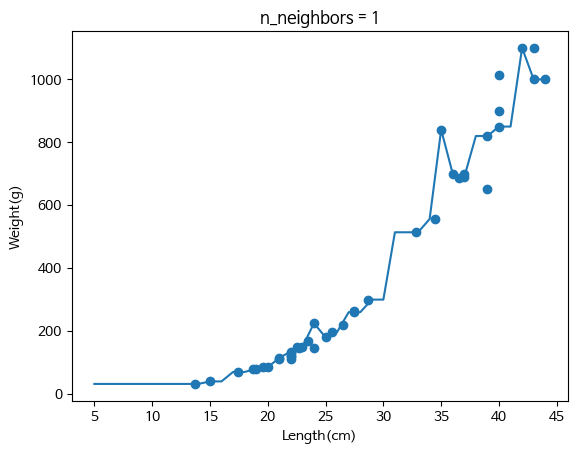

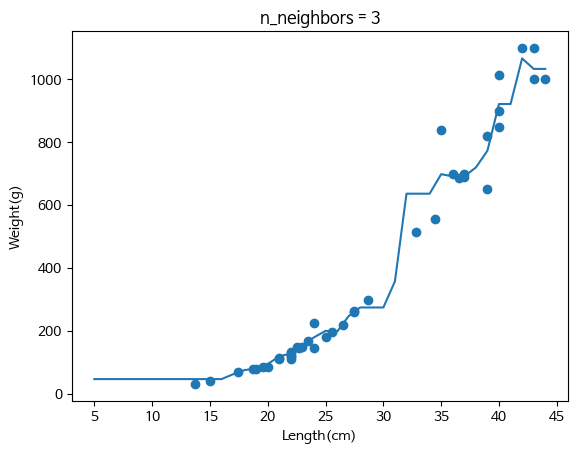

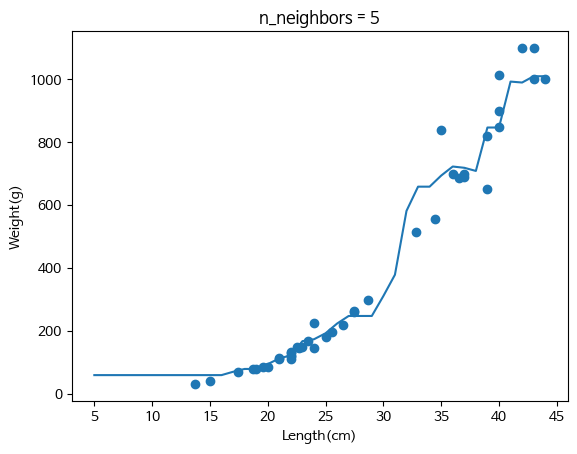

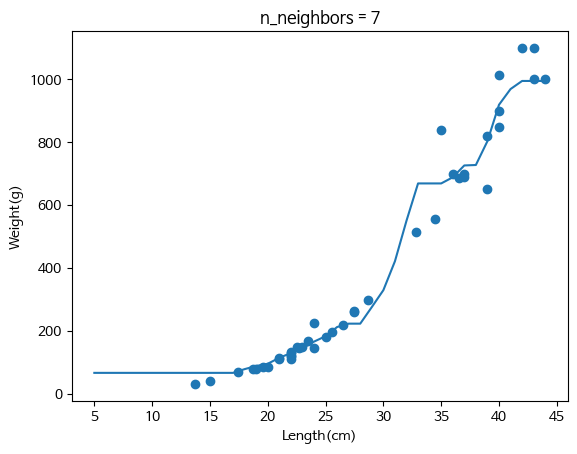

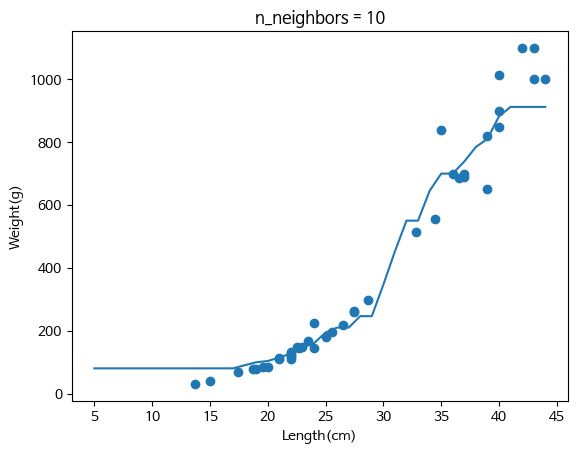

In [26]:
knr = KNeighborsRegressor()    # k-최근접 이웃 회귀 객체 생성
x = np.arange(5, 45).reshape(-1, 1)    # 5 ~ 45까지 x좌표 생성

# n = 1, 5, 10일 때 예측 결과를 그래프로 생성
for n in [1, 3, 5, 7, 10]:
    knr.n_neighbors = n    # 모델 훈련
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)    # 지정한 범위 x에 대한 예측 구하기
    plt.scatter(train_input, train_target)    # 훈련세트와 예측 결과 그래프 그리기
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'. format(n))
    plt.xlabel('Length(cm)')
    plt.ylabel('Weight(g)')
    plt.show()